In [1]:
#Импортируем данные
import pandas as pd
df = pd.read_csv('forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [2]:
#Заменяем текст на числовые значения 
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
day_mapping = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7}
df['month'] = df['month'].map(month_mapping)
df['day'] = df['day'].map(day_mapping)

In [3]:
#Масштабируем
from sklearn.preprocessing import MinMaxScaler
features_to_scale = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
min_max_scaler = MinMaxScaler()
df[features_to_scale] = min_max_scaler.fit_transform(df[features_to_scale])

In [4]:
#Категориальные признаки кодируем с помощью OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_features = encoder.fit_transform(df[['month', 'day']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['month', 'day']))
df_encoded = pd.concat([df.drop(['month', 'day'], axis=1), encoded_df], axis=1)

In [5]:
df_encoded

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_9,month_10,month_11,month_12,day_2,day_3,day_4,day_5,day_6,day_7
0,0.750,0.428571,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.750,0.285714,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.750,0.285714,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.875,0.571429,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.875,0.571429,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.375,0.142857,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
513,0.125,0.285714,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
514,0.750,0.285714,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
515,0.000,0.285714,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


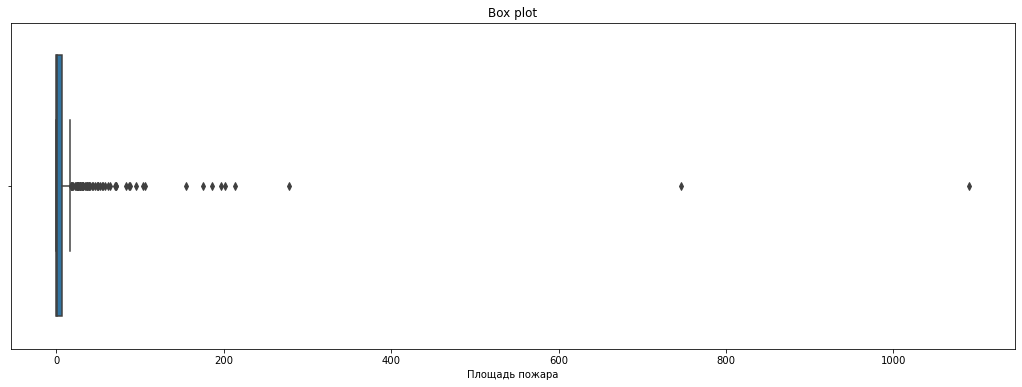

In [6]:
#Строим box plot для таргетного столбца, чтобы посмотреть выбросы
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))
sns.boxplot(x=df_encoded['area'])
plt.xlabel('Площадь пожара')
plt.title('Box plot')
plt.show()

In [7]:
#Обрабатываем выбросы
Q1 = df_encoded['area'].quantile(0.25)
Q3 = df_encoded['area'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df_filtered = df_encoded[(df_encoded['area'] >= lower) & (df_encoded['area'] <= upper)]
print('Осталось строк:',len(df_filtered))

Осталось строк: 454


In [8]:
#Разбиваем на train и set
from sklearn.model_selection import train_test_split
X = df_filtered.drop('area', axis=1)
y = df_filtered['area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [9]:
#Обучение линейной регрессии
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
print("Среднеквадратичная ошибка на тренировочных данных:", mse_train)
print("Среднеквадратичная ошибка на тестовых данных:", mse_test)

Среднеквадратичная ошибка на тренировочных данных: 12.890350901749361
Среднеквадратичная ошибка на тестовых данных: 14.95474490294088


In [10]:
#Получаем наилучшее количество признаков
from sklearn.feature_selection import RFE, RFECV

selector = RFECV(model, cv=100)
selector.fit(X_train, y_train)
best_n_features = selector.n_features_

print("Наилучшее количество признаков:", best_n_features)

Наилучшее количество признаков: 7


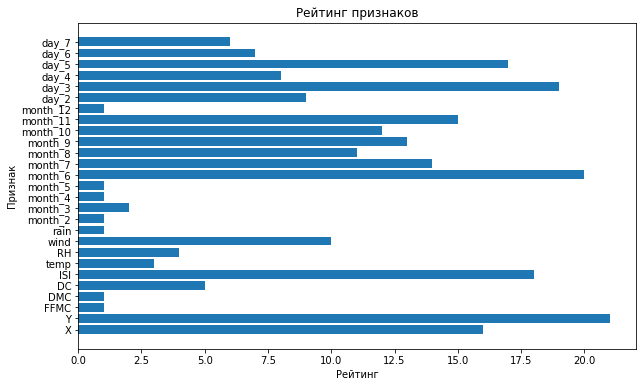

In [11]:
#Проводим отбор признаков с помощью RFE
selector = RFE(model, n_features_to_select=best_n_features)
selector.fit(X_train, y_train)
feature_ranks = selector.ranking_
feature_names = X_train.columns

# Строим график рейтингов признаков
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_ranks)
plt.xlabel('Рейтинг')
plt.ylabel('Признак')
plt.title('Рейтинг признаков')
plt.show()

In [12]:
selected_features = X_train.columns[selector.support_]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Обучаем линейную регрессию на отобранных признаках
model = LinearRegression()
model.fit(X_train_selected, y_train)

mse_test = mean_squared_error(y_test, model.predict(X_test_selected))
print("Среднеквадратичная ошибка на тестовых данных:", mse_test)

Среднеквадратичная ошибка на тестовых данных: 13.941095450595652


In [13]:
from sklearn.linear_model import Ridge, Lasso

# Обучение Ridge регрессии
ridge_model = Ridge(alpha=0.01)
ridge_model.fit(X_train, y_train)
y_testR_pred=ridge_model.predict(X_test)

mse_test_ridge = mean_squared_error(y_test, y_testR_pred)
print("Среднеквадратичная ошибка Ridge на тестовых данных:", mse_test_ridge)

# Обучение Lasso регрессии
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)
y_testL_pred=lasso_model.predict(X_test)

mse_test_lasso = mean_squared_error(y_test, y_testL_pred)
print("Среднеквадратичная ошибка Lasso на тестовых данных:", mse_test_lasso)

Среднеквадратичная ошибка Ridge на тестовых данных: 14.954801490567894
Среднеквадратичная ошибка Lasso на тестовых данных: 14.627822370250646
